In [8]:
import pandas as pd
alt_format = "%m.%d.%Y %H:%M:%S"
import matplotlib.pyplot as plt

In [9]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

file_names = list(uploaded.keys())

df_applications = pd.read_csv(io.BytesIO(uploaded[file_names[0]]))
df_industries = pd.read_csv(io.BytesIO(uploaded[file_names[1]]))

print("Datele inițiale din applications.csv:")
print(df_applications.head())
print("\nDatele inițiale din industries.csv:")
print(df_industries.head())

Saving applications.csv to applications.csv
Saving industries.csv to industries.csv
Datele inițiale din applications.csv:
            Applied at   Amount  Age  Gender                      Industry  \
0  11.30.2022 10:26:37  12000.0   29    Male                    Blockchain   
1  11.30.2022 10:26:39      NaN   36    Male  Public services / Government   
2  11.30.2022 10:26:58   7500.0   34    Male          Adtech / Advertising   
3  11.30.2022 10:27:31   1500.0   23  Female                       Telecom   
4  11.30.2022 10:27:34   8400.0   33  Female                    Automotive   

  Marital status  External Rating  \
0          Other              8.0   
1         Single              3.0   
2         Single              4.0   
3         Single              0.0   
4         Single              6.0   

                                     Education level         Location  \
0  Higher Degree (bachelor's, specialist's, maste...    Spain, Madrid   
1  Higher Degree (bachelor's, specialist

In [10]:
df_applications['Applied at'] = pd.to_datetime(df_applications['Applied at'], format='%m.%d.%Y %H:%M', errors='coerce')

In [11]:
df_applications = df_applications.drop_duplicates(subset='applicant_id')

In [12]:
df_applications['External Rating'] = df_applications['External Rating'].fillna(0)

In [13]:
df_applications['Education level'] = df_applications['Education level'].fillna('Average')

In [14]:
df_merged = pd.merge(df_applications, df_industries, on='Industry', how='left')

In [15]:
evaluation = (
    (df_merged['Age'].between(35, 55) * 20) +
    (pd.to_datetime(df_merged['Applied at']).dt.dayofweek >= 5) * 20 +
    (df_merged['Marital status'] == 'Married') * 20 +
    ((df_merged['Location'] == 'Kyiv') | (df_merged['Location'] == 'Region')) * 10 +
    df_merged['Score'] +
    (df_merged['External Rating'] >= 7) * 20 -
    (df_merged['External Rating'] <= 2) * 20
)


In [16]:
file_path_industries = "industries.csv"
df_industries = pd.read_csv(file_path_industries)
df_merged = pd.merge(df_applications, df_industries, on='Industry', how='left')

In [17]:
df_merged['Evaluation'] = evaluation.clip(lower=0, upper=100)

In [19]:
df_accepted = df_merged[df_merged['Evaluation'] > 0]

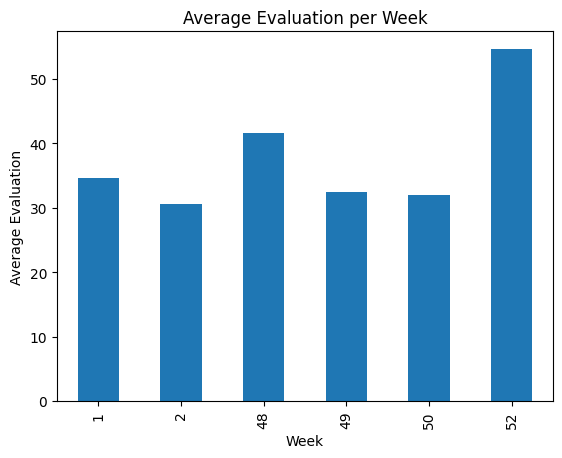

In [20]:
weekly_evaluation = df_accepted.groupby(df_accepted['Applied at'].dt.isocalendar().week)['Evaluation'].mean()
weekly_evaluation.plot(kind='bar', xlabel='Week', ylabel='Average Evaluation', title='Average Evaluation per Week')
plt.show()